# Part 1

# Reasons for choosing your data set

The dataset I have chosen (http://insideairbnb.com/get-the-data.html) contains the listing information of Airbnb’s in the city of Seattle. After having a look at this dataset, I wanted to study it in further detail and see what I could find from it. Which is what I will be doing in this coursework. The data was compiled together on the 25th of September 2021, meaning I will be working with up-to-date data. Originally found this dataset on Kaggle but found a newer version of this data from the original source which was given in Kaggle. When looking for a dataset I had a dilemma choosing between this or another dataset. The reason being this dataset has 4000 instances and 74 Attributes while the other one had 10000 instances but only 9 attributes (so I was unsure which would be more important more rows or more columns). After some thought and help from the lab helper I felt that more columns would mean I would be able to find more features from the data and be able to find some more interesting patterns and trends from the data.  

## Setup

In [208]:
import sys
assert sys.version_info >= (3, 5)
# Python ≥3.5 is required

In [209]:
# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

In [210]:
# Common imports
import numpy as np
import os
import tarfile
import urllib
import pandas as pd
import urllib.request




In [211]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [212]:
import cv2

In [213]:
# To plot figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [214]:
#seaborn builds on top of matplotlib and integrates closely with pandas data structures.
import seaborn as sns
sns.set_theme(style="ticks", color_codes=True)


In [215]:
listing_dataset = pd.read_csv("listings.csv")

# Data Engineering

## Get, Prepare & Clean the data

in the tutorials the cleaning stage was done after visualisation however I did it all together as processing was needed for me to able to do some of the visulisation.

In [216]:
pwd

'/Users/adithyasripada/Documents/Adithya/Computing/CS Y4/F20DL/CW'

In [217]:
#shows the first 5 rows of each column.
listing_dataset.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2318,https://www.airbnb.com/rooms/2318,2.021090e+13,25/09/2021,Casa Madrona - Urban Oasis 1 block from the park!,"Gorgeous, architect remodeled, Dutch Colonial ...",Madrona is a hidden gem of a neighborhood. It ...,https://a0.muscache.com/pictures/02973ad3-a7a3...,2536,https://www.airbnb.com/users/show/2536,Megan,26/08/2008,"Seattle, Washington, United States",I welcome guests from all walks of life and ev...,within an hour,100%,90%,f,https://a0.muscache.com/im/pictures/user/016a1...,https://a0.muscache.com/im/pictures/user/016a1...,Minor,2,2,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Seattle, Washington, United States",Madrona,Central Area,47.61094,-122.29286,Entire residential home,Entire home/apt,9,NaN,2.5 baths,4.0,4.0,"[""Free parking on premises"", ""Coffee maker"", ""...",$449.00,7,1125,7.0,7.0,1125.0,1125.0,7.0,1125.0,NaN,t,0,0,24,204,25/09/2021,35,3,0,10/01/2017,07/08/2021,4.97,5.00,5.00,5.00,5.00,4.97,4.82,STR-OPLI-19-002837,t,1,1,0,0,0.61
1,6606,https://www.airbnb.com/rooms/6606,2.021090e+13,25/09/2021,"Fab, private seattle urban cottage!","This tiny cottage is only 15x10, but it has ev...","A peaceful yet highly accessible neighborhood,...",https://a0.muscache.com/pictures/45742/21116d7...,14942,https://www.airbnb.com/users/show/14942,Joyce,26/04/2009,"Seattle, Washington, United States",I am a therapist/innkeeper.I know my city well...,within an hour,100%,92%,f,https://a0.muscache.com/im/users/14942/profile...,https://a0.muscache.com/im/users/14942/profile...,Wallingford,5,5,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,"Seattle, Washington, United States",Wallingford,Other neighborhoods,47.65444,-122.33629,Entire guesthouse,Entire home/apt,2,NaN,1 bath,1.0,1.0,"[""Free parking on premises"", ""Coffee maker"", ""...",$99.00,3,1125,3.0,3.0,1125.0,1125.0,3.0,1125.0,NaN,t,0,0,0,0,25/09/2021,157,8,2,30/05/2016,14/09/2021,4.60,4.67,4.67,4.82,4.76,4.88,4.56,str-opli-19-002622,f,1,1,0,0,2.42
2,9419,https://www.airbnb.com/rooms/9419,2.021090e+13,25/09/2021,Glorious sun room w/ memory foambed,"Keeping you safe is our priority, we are adher...","Lots of restaurants (see our guide book) bars,...",https://a0.muscache.com/pictures/56645186/e5fb...,30559,https://www.airbnb.com/users/show/30559,Angielena,09/08/2009,"Seattle, Washington, United States",I am a visual artist who is the director of ...,within a few hours,100%,87%,t,https://a0.muscache.com/im/users/30559/profile...,https://a0.muscache.com/im/users/30559/profile...,Georgetown,9,9,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Seattle, Washington, United States",Georgetown,Other neighborhoods,47.55017,-122.31937,Private room in rental unit,Pr

From this we can already see what types of data each column stores without having to load the whole data set.

In [218]:
#shows all the values in the dataset.
listing_dataset.columns.values

array(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed',
       'latitude', 'longitude', 'property_type', 'room_type',
       'accommodates', 'bathrooms', 'bathrooms_text', 'bedrooms', 'beds',
       'amenities', 'price', 'minimum_nights', 'maximum_nights',
       'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm',
       'calen

In [219]:
#This Function returns the percentage of missing values for each attribute.
(len(listing_dataset)-listing_dataset.count())/len(listing_dataset)*100

id                                                0.000000
listing_url                                       0.000000
scrape_id                                         0.000000
last_scraped                                      0.000000
name                                              0.000000
description                                       0.235349
neighborhood_overview                            26.665098
picture_url                                       0.000000
host_id                                           0.000000
host_url                                          0.000000
host_name                                         0.000000
host_since                                        0.000000
host_location                                     0.117675
host_about                                       25.041186
host_response_time                               13.767945
host_response_rate                               13.767945
host_acceptance_rate                             12.5441

In [220]:
#This method prints information about a DataFrame including the dtype and columns, non-null values and memory usage.
listing_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4249 entries, 0 to 4248
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            4249 non-null   int64  
 1   listing_url                                   4249 non-null   object 
 2   scrape_id                                     4249 non-null   float64
 3   last_scraped                                  4249 non-null   object 
 4   name                                          4249 non-null   object 
 5   description                                   4239 non-null   object 
 6   neighborhood_overview                         3116 non-null   object 
 7   picture_url                                   4249 non-null   object 
 8   host_id                                       4249 non-null   int64  
 9   host_url                                      4249 non-null   o

The .info() method gives us some valuable information about the dataset, which we can use to give us a sense of which attributes may need some pre-processing. As can be seen quite a few attributes have missing values and also have the object data type. So now we will try process and select data that can be used for our tasks.

In [221]:
#Here I am removing the $ and , from the columns and then coverting the overall data type to float64
pd.set_option('display.max_rows', None)
listing_dataset[["price"]]=listing_dataset[["price"]].replace({r'\$':''},regex=True)
listing_dataset[["price"]]=listing_dataset[["price"]].replace({r'\,':''},regex=True)
listing_dataset[["price"]] = listing_dataset[["price"]].astype(float)
listing_dataset[["price"]].dtypes
#a.astype(float)

price    float64
dtype: object

In [222]:
#Here I am removing any words from the columns, leaving only numbers and then coverting the overall data type to float64
pd.set_option('display.max_rows', None)
listing_dataset[["bathrooms_text"]]=listing_dataset[["bathrooms_text"]].replace({r'bath':''},regex=True)
listing_dataset[["bathrooms_text"]]=listing_dataset[["bathrooms_text"]].replace({r'baths':''},regex=True)
listing_dataset[["bathrooms_text"]]=listing_dataset[["bathrooms_text"]].replace({r'shared':''},regex=True)
listing_dataset[["bathrooms_text"]]=listing_dataset[["bathrooms_text"]].replace({r'private':''},regex=True)
listing_dataset[["bathrooms_text"]]=listing_dataset[["bathrooms_text"]].replace({r'Shared half-':''},regex=True)
listing_dataset[["bathrooms_text"]]=listing_dataset[["bathrooms_text"]].replace({r'Private half-':''},regex=True)
listing_dataset[["bathrooms_text"]]=listing_dataset[["bathrooms_text"]].replace({r'Half-':''},regex=True)
listing_dataset[["bathrooms_text"]]=listing_dataset[["bathrooms_text"]].replace({r's':''},regex=True)
listing_dataset[["bathrooms_text"]] = listing_dataset[["bathrooms_text"]].astype(float)
listing_dataset[["bathrooms_text"]].dtypes

bathrooms_text    float64
dtype: object

In [223]:
listing_dataset[["calculated_host_listings_count"]]= listing_dataset[["calculated_host_listings_count"]].astype(float)
listing_dataset[["calculated_host_listings_count"]].dtypes

calculated_host_listings_count    float64
dtype: object

In [224]:
listing_dataset[["calculated_host_listings_count_entire_homes"]]= listing_dataset[["calculated_host_listings_count_entire_homes"]].astype(float)
listing_dataset[["calculated_host_listings_count_entire_homes"]].dtypes

calculated_host_listings_count_entire_homes    float64
dtype: object

In [225]:
listing_dataset[["calculated_host_listings_count_private_rooms"]]= listing_dataset[["calculated_host_listings_count_private_rooms"]].astype(float)
listing_dataset[["calculated_host_listings_count_private_rooms"]].dtypes

calculated_host_listings_count_private_rooms    float64
dtype: object

In [226]:
listing_dataset[["calculated_host_listings_count_shared_rooms"]]= listing_dataset[["calculated_host_listings_count_shared_rooms"]].astype(float)
listing_dataset[["calculated_host_listings_count_shared_rooms"]].dtypes

calculated_host_listings_count_shared_rooms    float64
dtype: object

So far the dataset has some unnessecary information that we cant and wont use when processing our data, so we are going to create a smaller dataframe and work on that, we will be dropping the attributes about the host and the urls and descriptions as we will not be able to process that data.

In [227]:
# Creating a Dataframe which consists of all the columns that we will use for the tasks in the dataset.
#We removed the host, Url and Description columns .
listing_df = listing_dataset[['id', 'neighbourhood_group_cleansed',
       'latitude', 'longitude', 'property_type', 'room_type',
       'accommodates', 'bathrooms_text', 'bedrooms', 'beds',
        'price', 'minimum_nights', 'maximum_nights',
       'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm',
       'availability_30','availability_60', 'availability_90', 'availability_365',
       'number_of_reviews','number_of_reviews_ltm', 'number_of_reviews_l30d','review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month']]

In [228]:
listing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4249 entries, 0 to 4248
Data columns (total 39 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            4249 non-null   int64  
 1   neighbourhood_group_cleansed                  4249 non-null   object 
 2   latitude                                      4249 non-null   float64
 3   longitude                                     4249 non-null   float64
 4   property_type                                 4249 non-null   object 
 5   room_type                                     4249 non-null   object 
 6   accommodates                                  4249 non-null   int64  
 7   bathrooms_text                                4249 non-null   float64
 8   bedrooms                                      3664 non-null   float64
 9   beds                                          4128 non-null   f

Now we are looking at the dataframe's info, which is showing us that there are some missing values and some data types are still object, we will continue to pre-process this.

In [229]:
#checking to see if there are any duplicate values.
duplicate_vals = listing_df.duplicated()
duplicate_vals.sum()

0

In [230]:
#Checking for NaN values in the DF.
(len(listing_df)-listing_df.count())/len(listing_df)*100

id                                               0.000000
neighbourhood_group_cleansed                     0.000000
latitude                                         0.000000
longitude                                        0.000000
property_type                                    0.000000
room_type                                        0.000000
accommodates                                     0.000000
bathrooms_text                                   0.000000
bedrooms                                        13.767945
beds                                             2.847729
price                                            0.000000
minimum_nights                                   0.000000
maximum_nights                                   0.000000
minimum_minimum_nights                           0.070605
maximum_minimum_nights                           0.070605
minimum_maximum_nights                           0.070605
maximum_maximum_nights                           0.070605
minimum_nights

In [231]:
#Dropping the rows with NaN values.
listing_df2=listing_df.dropna(axis=0)

In [232]:
#Checking to see % of dropped NaN values.
(len(listing_df)-len(listing_df2))/len(listing_df)*100

27.347611202635914

In [233]:
#Checking if the NaN values have been dropped.
(len(listing_df2)-listing_df2.count())/len(listing_df2)*100

id                                              0.0
neighbourhood_group_cleansed                    0.0
latitude                                        0.0
longitude                                       0.0
property_type                                   0.0
room_type                                       0.0
accommodates                                    0.0
bathrooms_text                                  0.0
bedrooms                                        0.0
beds                                            0.0
price                                           0.0
minimum_nights                                  0.0
maximum_nights                                  0.0
minimum_minimum_nights                          0.0
maximum_minimum_nights                          0.0
minimum_maximum_nights                          0.0
maximum_maximum_nights                          0.0
minimum_nights_avg_ntm                          0.0
maximum_nights_avg_ntm                          0.0
availability

In [234]:
#These are the columns which have the object datatype
non_numerical_vals = listing_df2.select_dtypes(include=['object']).columns
listing_df2[non_numerical_vals]

,neighbourhood_group_cleansed,property_type,room_type,instant_bookable
0,Central Area,Entire residential home,Entire home/apt,t
1,Other neighborhoods,Entire guesthouse,Entire home/apt,f
2,Other neighborhoods,Private room in rental unit,Private room,f
3,West Seattle,Entire residential home,Entire home/apt,f
4,West Seattle,Entire guest suite,Entire home/apt,f
5,West Seattle,Entire residential home,Entire home/apt,t
6,Delridge,Private room in residential home,Private room,f
7,Delridge,Private room in residential home,Private room,f
8,Ballard,Entire guest suite,Entire home/apt,t
9,Ballard,Entire rental unit,Entire home/apt,f


In [235]:
#This will use the pandas .get_dummies() method to to take those object values and convert them into numerical values
dummies = pd.get_dummies(listing_df2[non_numerical_vals], drop_first = True)


In [236]:
#Now we will merge the new numerical values columns and drop the non-numerical columns from the dataframe
listing_df3 = listing_df2.drop(non_numerical_vals,axis=1)
listing_df3 = pd.merge(listing_df3,dummies, left_index=True, right_index=True)
listing_df3.head()

,id,latitude,longitude,accommodates,bathrooms_text,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,neighbourhood_group_cleansed_Beacon Hill,neighbourhood_group_cleansed_Capitol Hill,neighbourhood_group_cleansed_Cascade,neighbourhood_group_cleansed_Central Area,neighbourhood_group_cleansed_Delridge,neighbourhood_group_cleansed_Downtown,neighbourhood_group_cleansed_Interbay,neighbourhood_group_cleansed_Lake City,neighbourhood_group_cleansed_Magnolia,neighbourhood_group_cleansed_Northgate,neighbourhood_group_cleansed_Other neighborhoods,neighbourhood_group_cleansed_Queen Anne,neighbourhood_group_cleansed_Rainier Valley,neighbourhood_group_cleansed_Seward Park,neighbourhood_group_cleansed_University District,neighbourhood_group_cleansed_West Seattle,property_type_Camper/RV,property_type_Casa particular,property_type_Entire bungalow,property_type_Entire cabin,property_type_Entire condominium (condo),property_type_Entire cottage,property_type_Entire guest suite,property_type_Entire guesthouse,property_type_Entire loft,property_type_Entire rental unit,property_type_Entire residential home,property_type_Entire serviced apartment,property_type_Entire townhouse,property_type_Entire villa,property_type_Houseboat,property_type_Private room,property_type_Private room in bed and breakfast,property_type_Private room in boat,property_type_Private room in bungalow,property_type_Private room in cabin,property_type_Private room in condominium (condo),property_type_Private room in cottage,property_type_Private room in earth house,property_type_Private room in guest suite,property_type_Private room in guesthouse,property_type_Private room in loft,property_type_Private room in rental unit,property_type_Private room in residential home,property_type_Private room in serviced apartment,property_type_Private room in tiny house,property_type_Private room in townhouse,property_type_Private room in treehouse,property_type_Private room in villa,property_type_Room in aparthotel,property_type_Room in boutique hotel,property_type_Room in hotel,property_type_Shared room,property_type_Shared room in residential home,property_type_Shared room in townhouse,property_type_Tent,property_type_Tiny house,room_type_Private room,room_type_Shared room,instant_bookable_t
0,2318,47.61094,-122.29286,9,2.5,4.0,4.0,449.0,7,1125,7.0,7.0,1125.0,1125.0,7.0,1125.0,0,0,24,204,35,3,0,4.97,5.00,5.00,5.00,5.00,4.97,4.82,1.0,1.0,0.0,0.0,0.61,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,6606,47.65444,-122.33629,2,1.0,1.0,1.0,99.0,3,1125,3.0,3.0,1125.0,1125.0,3.0,1125.0,0,0,0,0,157,8,2,4.60,4.67,4.67,4.82,4.76,4.88,4.56,1.0,1.0,0.0,0.0,2.42,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,9419,47.55017,-122.31937,2,3.0,1.0,2.0,75.0,2,180,2.0,2.0,180.0,180.0,2.0,180.0,9,39,69,344,153,5,0,4.67,4.75,4.72,4.92,4.89,4.65,4.62,9.0,0.0,9.0,0.0,1.13,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,9531,47.55495,-122.38663,4,1.0,2.0,3.0,174.0,3,1125,3.0,3.0,1125.0,1125.0,3.0,1125.0,1,16,36,265,49,9,2,4.96,4.98,4.96,4.98,4.94,4.98,4.88,2.0,2.0,0.0,0.0,0.55,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,

In [237]:
#This method shows a statistical summary of the numerical attributes 
pd.set_option('display.max_columns', None)
listing_df3.describe() 

,id,latitude,longitude,accommodates,bathrooms_text,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,neighbourhood_group_cleansed_Beacon Hill,neighbourhood_group_cleansed_Capitol Hill,neighbourhood_group_cleansed_Cascade,neighbourhood_group_cleansed_Central Area,neighbourhood_group_cleansed_Delridge,neighbourhood_group_cleansed_Downtown,neighbourhood_group_cleansed_Interbay,neighbourhood_group_cleansed_Lake City,neighbourhood_group_cleansed_Magnolia,neighbourhood_group_cleansed_Northgate,neighbourhood_group_cleansed_Other neighborhoods,neighbourhood_group_cleansed_Queen Anne,neighbourhood_group_cleansed_Rainier Valley,neighbourhood_group_cleansed_Seward Park,neighbourhood_group_cleansed_University District,neighbourhood_group_cleansed_West Seattle,property_type_Camper/RV,property_type_Casa particular,property_type_Entire bungalow,property_type_Entire cabin,property_type_Entire condominium (condo),property_type_Entire cottage,property_type_Entire guest suite,property_type_Entire guesthouse,property_type_Entire loft,property_type_Entire rental unit,property_type_Entire residential home,property_type_Entire serviced apartment,property_type_Entire townhouse,property_type_Entire villa,property_type_Houseboat,property_type_Private room,property_type_Private room in bed and breakfast,property_type_Private room in boat,property_type_Private room in bungalow,property_type_Private room in cabin,property_type_Private room in condominium (condo),property_type_Private room in cottage,property_type_Private room in earth house,property_type_Private room in guest suite,property_type_Private room in guesthouse,property_type_Private room in loft,property_type_Private room in rental unit,property_type_Private room in residential home,property_type_Private room in serviced apartment,property_type_Private room in tiny house,property_type_Private room in townhouse,property_type_Private room in treehouse,property_type_Private room in villa,property_type_Room in aparthotel,property_type_Room in boutique hotel,property_type_Room in hotel,property_type_Shared room,property_type_Shared room in residential home,property_type_Shared room in townhouse,property_type_Tent,property_type_Tiny house,room_type_Private room,room_type_Shared room,instant_bookable_t
count,3.087000e+03,3087.000000,3087.000000,3087.000000,3087.000000,3087.000000,3087.000000,3087.000000,3087.000000,3087.000000,3087.000000,3087.000000,3087.000000,3087.000000,3087.000000,3087.000000,3087.000000,3087.000000,3087.000000,3087.000000,3087.000000,3087.000000,3087.000000,3087.000000,3087.000000,3087.000000,3087.000000,3087.000000,3087.000000,3087.000000,3087.000000,3087.000000,3087.000000,3087.000000,3087.000000,3087.000000,3087.000000,3087.000000,3087.000000,3087.000000,3087.000000,3087.000000,3087.000000,3087.000000,3087.000000,3087.000000,3087.000000,3087.000000,3087.000000,3087.000000,3087.000000,3087.000000,3087.000000,3087.000000,3087.000000,3087.000000,3087.000000,3087.000000,3087.000000,3087.000000,3087.000000,3087.000000,3087.000000,3087.000000,3087.000000,3087.000000,3087.000000,3087.000000,3087.000000,3087.000000,3087.000000,3087.000000,3087.000000,3087.000000,3087.000000,3087.000000,3087.000000,3087.000000,3087.000000,3087.000000,3087.000000,3087.000000,3087.000000,3087.000000,3087.000000,3087.000000,3087.000000,3087.000000,3087.000000,3087.000000,3087.000000,3087.000000,3087.00000

## Experimenting with Attribute Combinations

In [238]:
#listing_df3["rooms_per_household"] = listing_df3["total_rooms"]+listing_df3["households"]
#listing_df3["bedrooms_per_room"] = listing_df3["total_bedrooms"]/listing_df3["total_rooms"]
#listing_df3["population_per_household"]=listing_df3["population"]/listing_df3["households

In [239]:
corr_matrix = listing_df3.corr() # computes the standard correlation coefficient (Pearson’s r) between every pair of attributes
corr_matrix["price"].sort_values(ascending=False)

price                                                1.000000
bedrooms                                             0.635259
accommodates                                         0.615051
beds                                                 0.558952
bathrooms_text                                       0.541549
property_type_Entire residential home                0.386751
property_type_Entire townhouse                       0.169083
neighbourhood_group_cleansed_Queen Anne              0.138513
availability_30                                      0.114986
review_scores_location                               0.114288
property_type_Entire villa                           0.103592
review_scores_rating                                 0.096744
availability_60                                      0.087913
review_scores_cleanliness                            0.086359
property_type_Private room in boat                   0.071404
neighbourhood_group_cleansed_Downtown                0.066713
availabi

# Prepare the Data for Machine Learning Algorithms

In [240]:
#Dropping Price 
listing_df4 = listing_df3.drop("price", axis=1) 


In [241]:
listing_df3.describe()

,id,latitude,longitude,accommodates,bathrooms_text,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,neighbourhood_group_cleansed_Beacon Hill,neighbourhood_group_cleansed_Capitol Hill,neighbourhood_group_cleansed_Cascade,neighbourhood_group_cleansed_Central Area,neighbourhood_group_cleansed_Delridge,neighbourhood_group_cleansed_Downtown,neighbourhood_group_cleansed_Interbay,neighbourhood_group_cleansed_Lake City,neighbourhood_group_cleansed_Magnolia,neighbourhood_group_cleansed_Northgate,neighbourhood_group_cleansed_Other neighborhoods,neighbourhood_group_cleansed_Queen Anne,neighbourhood_group_cleansed_Rainier Valley,neighbourhood_group_cleansed_Seward Park,neighbourhood_group_cleansed_University District,neighbourhood_group_cleansed_West Seattle,property_type_Camper/RV,property_type_Casa particular,property_type_Entire bungalow,property_type_Entire cabin,property_type_Entire condominium (condo),property_type_Entire cottage,property_type_Entire guest suite,property_type_Entire guesthouse,property_type_Entire loft,property_type_Entire rental unit,property_type_Entire residential home,property_type_Entire serviced apartment,property_type_Entire townhouse,property_type_Entire villa,property_type_Houseboat,property_type_Private room,property_type_Private room in bed and breakfast,property_type_Private room in boat,property_type_Private room in bungalow,property_type_Private room in cabin,property_type_Private room in condominium (condo),property_type_Private room in cottage,property_type_Private room in earth house,property_type_Private room in guest suite,property_type_Private room in guesthouse,property_type_Private room in loft,property_type_Private room in rental unit,property_type_Private room in residential home,property_type_Private room in serviced apartment,property_type_Private room in tiny house,property_type_Private room in townhouse,property_type_Private room in treehouse,property_type_Private room in villa,property_type_Room in aparthotel,property_type_Room in boutique hotel,property_type_Room in hotel,property_type_Shared room,property_type_Shared room in residential home,property_type_Shared room in townhouse,property_type_Tent,property_type_Tiny house,room_type_Private room,room_type_Shared room,instant_bookable_t
count,3.087000e+03,3087.000000,3087.000000,3087.000000,3087.000000,3087.000000,3087.000000,3087.000000,3087.000000,3087.000000,3087.000000,3087.000000,3087.000000,3087.000000,3087.000000,3087.000000,3087.000000,3087.000000,3087.000000,3087.000000,3087.000000,3087.000000,3087.000000,3087.000000,3087.000000,3087.000000,3087.000000,3087.000000,3087.000000,3087.000000,3087.000000,3087.000000,3087.000000,3087.000000,3087.000000,3087.000000,3087.000000,3087.000000,3087.000000,3087.000000,3087.000000,3087.000000,3087.000000,3087.000000,3087.000000,3087.000000,3087.000000,3087.000000,3087.000000,3087.000000,3087.000000,3087.000000,3087.000000,3087.000000,3087.000000,3087.000000,3087.000000,3087.000000,3087.000000,3087.000000,3087.000000,3087.000000,3087.000000,3087.000000,3087.000000,3087.000000,3087.000000,3087.000000,3087.000000,3087.000000,3087.000000,3087.000000,3087.000000,3087.000000,3087.000000,3087.000000,3087.000000,3087.000000,3087.000000,3087.000000,3087.000000,3087.000000,3087.000000,3087.000000,3087.000000,3087.000000,3087.000000,3087.000000,3087.000000,3087.000000,3087.000000,3087.000000,3087.00000

In [242]:
listing_df3["price_bins"] = pd.cut(listing_df3["price"],
                               bins=[0,200,400,600,800,1000,1200,1400,1600,1800, np.inf],
                               labels=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
listing_df3["price_bins"].astype(int)

0       3
1       1
2       1
3       1
4       1
5       1
6       1
7       1
8       1
9       1
10      1
12      1
13      1
14      1
15      1
16      1
17      1
18      2
19      4
20      2
21      1
22      2
23      1
24      1
25      1
26      1
27      2
28      1
29      1
30      1
31      1
32      3
33      1
34      1
35      1
36      1
37      1
38      1
39      1
40      1
41      2
42      1
43      3
44      1
45      1
46      1
47      1
48      1
49      2
50      1
51      1
52      1
53      1
54      1
55      2
56      1
57      1
58      1
59      1
60      1
61      1
62      1
63      2
65      2
66      1
67      1
68      1
69      1
70      1
71      2
72      1
73      2
74      1
75      1
76      1
77      1
78      1
79      2
80      1
81      1
82      3
84      2
85      1
86      2
87      1
88      1
89      1
90      1
91      1
92      1
93      1
94      1
95      2
96      1
97      1
98      1
99      1
100     1
101     1
102     1


In [243]:
listing_df3["price_bins"].value_counts()

1     2358
2      608
3       86
4       19
5       12
6        2
7        1
8        1
9        0
10       0
Name: price_bins, dtype: int64

<AxesSubplot:>

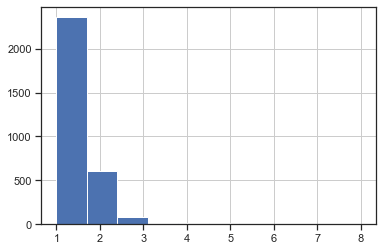

In [244]:
listing_df3["price_bins"].hist()

# Decision Tree and Logistic Regression

In [245]:
X_df = listing_df4



In [246]:
y_df = listing_df3['price_bins']
y=y_df.values
#y=np.ravel(y_df)

print(X_df.shape)

print(y.shape)

(3087, 94)
(3087,)


In [260]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier

### Splitting Data into training and testing data

In [333]:
X_train, X_test, y_train, y_test = train_test_split(X_df, y, test_size=0.2, random_state=1)

### Building Model and testing it on training data  

In [334]:
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

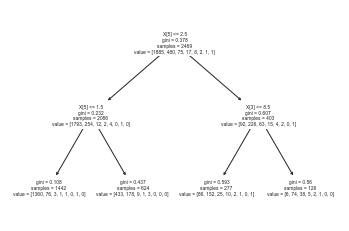

In [335]:
plot_tree(tree_clf);


In [336]:
y_train_pred = tree_clf.predict(X_train)
print("Accuracy:",accuracy_score(y_train, y__train_pred))

Accuracy: 0.8177399756986634


In [337]:
scores = cross_val_score(tree_clf, X_train, y_train, cv=10)
scores

/Users/adithyasripada/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


array([0.80566802, 0.8340081 , 0.80161943, 0.8340081 , 0.80566802,
       0.81781377, 0.8340081 , 0.8097166 , 0.79757085, 0.81707317])

#### Compared to a single accuracy score, it can clearly be seen that 10-fold cross validation makes a better estimate of model accuracy

In [338]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           1       0.87      0.95      0.91      1885
           2       0.56      0.47      0.51       480
           3       0.00      0.00      0.00        75
           4       0.00      0.00      0.00        17
           5       0.00      0.00      0.00         8
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         1

    accuracy                           0.82      2469
   macro avg       0.18      0.18      0.18      2469
weighted avg       0.77      0.82      0.79      2469



/Users/adithyasripada/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/adithyasripada/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/adithyasripada/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

In [339]:
y.dtype

CategoricalDtype(categories=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10], ordered=True)

### Model testing on test data 

In [340]:
y_pred = tree_clf.predict(X_test)


In [341]:
confusion_matrix(y_test, y_pred)

array([[442,  31,   0,   0,   0],
       [ 71,  57,   0,   0,   0],
       [  1,  10,   0,   0,   0],
       [  0,   2,   0,   0,   0],
       [  2,   2,   0,   0,   0]])

In [342]:
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.8074433656957929


#### It can be seen that accuracy score computed on unseen test data is lower than the accuracy score computed on training data. Since the model is trained on training data it is likely to overestimate accuracy scores on training data. This is why always true accuracy of a classifier is estimated on unseen test data.

In [343]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))#,target_names=[1,2,3,4,5,6,7,8,9,10]))

              precision    recall  f1-score   support

           1       0.86      0.93      0.89       473
           2       0.56      0.45      0.50       128
           3       0.00      0.00      0.00        11
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         4

    accuracy                           0.81       618
   macro avg       0.28      0.28      0.28       618
weighted avg       0.77      0.81      0.79       618



/Users/adithyasripada/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/adithyasripada/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/adithyasripada/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

In [344]:
yp_prob = tree_clf.predict_proba(X_test)[:,1]
yp_prob

array([0.05270458, 0.05270458, 0.54873646, 0.05270458, 0.05270458,
       0.58730159, 0.05270458, 0.05270458, 0.28525641, 0.05270458,
       0.05270458, 0.54873646, 0.05270458, 0.05270458, 0.05270458,
       0.05270458, 0.05270458, 0.05270458, 0.05270458, 0.05270458,
       0.58730159, 0.05270458, 0.54873646, 0.54873646, 0.05270458,
       0.05270458, 0.28525641, 0.05270458, 0.05270458, 0.05270458,
       0.05270458, 0.05270458, 0.28525641, 0.05270458, 0.28525641,
       0.28525641, 0.05270458, 0.05270458, 0.28525641, 0.54873646,
       0.05270458, 0.05270458, 0.05270458, 0.05270458, 0.54873646,
       0.05270458, 0.28525641, 0.05270458, 0.05270458, 0.05270458,
       0.54873646, 0.28525641, 0.54873646, 0.05270458, 0.05270458,
       0.05270458, 0.28525641, 0.05270458, 0.05270458, 0.05270458,
       0.05270458, 0.58730159, 0.05270458, 0.54873646, 0.05270458,
       0.28525641, 0.28525641, 0.05270458, 0.58730159, 0.05270458,
       0.28525641, 0.28525641, 0.05270458, 0.54873646, 0.05270

### Experimenting with decision tree parameters 

#### Spiltter strategy=random 

In [345]:
tree_rand_split_clf = DecisionTreeClassifier(max_depth=2, random_state=42, splitter="random")
tree_rand_split_clf.fit(X_train, y_train)
y_pred = tree_rand_split_clf.predict(X_test)
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.8074433656957929


#### In comparison to Best splitter strategy random splitter strategy improved model accuracy 

#### Gradually increasing max_depth 

In [346]:
tree_depth_clf = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_depth_clf.fit(X_train, y_train)
y_pred = tree_depth_clf.predict(X_test)
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.8236245954692557


In [347]:
tree_depth_clf = DecisionTreeClassifier(max_depth=4, random_state=42)
tree_depth_clf.fit(X_train, y_train)
y_pred = tree_depth_clf.predict(X_test)
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.8333333333333334


In [348]:
tree_depth_clf = DecisionTreeClassifier(max_depth=5, random_state=42)
tree_depth_clf.fit(X_train, y_train)
y_pred = tree_depth_clf.predict(X_test)
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.8333333333333334


In [349]:
tree_depth_clf = DecisionTreeClassifier(max_depth=6, random_state=42)
tree_depth_clf.fit(X_train, y_train)
y_pred = tree_depth_clf.predict(X_test)
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.8187702265372169


In [350]:
d1 = {'max_depth':[2,3,4,5,6],'accuracy':[0.807982740021575,0.8166127292340885,0.8155339805825242, 0.8122977346278317,0.8036677454153183]}
df1 = pd.DataFrame(data=d1)

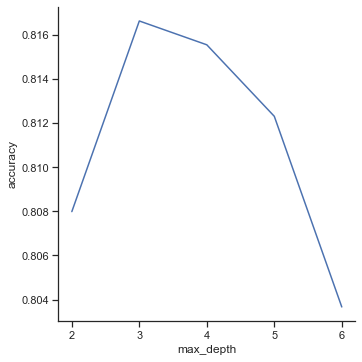

In [351]:
import seaborn as sns
sns.relplot(x="max_depth", y="accuracy", kind='line', data=df1);

#### As max_depth is increased from 2 to 3, accuracy increased, but further increases in max_depth caused accuracy to fall 

### Gradually increasing min_samples_leaf from 2 to 6

In [352]:
tree_leaf_clf = DecisionTreeClassifier(max_depth=3, random_state=42,min_samples_leaf=2)
tree_leaf_clf.fit(X_train, y_train)
y_pred = tree_leaf_clf.predict(X_test)
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.8236245954692557


In [353]:
tree_leaf_clf = DecisionTreeClassifier(max_depth=3, random_state=42,min_samples_leaf=3)
tree_leaf_clf.fit(X_train, y_train)
y_pred = tree_leaf_clf.predict(X_test)
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.8236245954692557


In [354]:
tree_leaf_clf = DecisionTreeClassifier(max_depth=3, random_state=42,min_samples_leaf=4)
tree_leaf_clf.fit(X_train, y_train)
y_pred = tree_leaf_clf.predict(X_test)
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.8236245954692557


In [355]:
tree_leaf_clf = DecisionTreeClassifier(max_depth=3, random_state=42,min_samples_leaf=5)
tree_leaf_clf.fit(X_train, y_train)
y_pred = tree_leaf_clf.predict(X_test)
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.8236245954692557


In [356]:
tree_leaf_clf = DecisionTreeClassifier(max_depth=3, random_state=42,min_samples_leaf=6)
tree_leaf_clf.fit(X_train, y_train)
y_pred = tree_leaf_clf.predict(X_test)
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.8236245954692557


In [357]:
d2 = {'min_samples_leaf':[1,2,3,4,5,6],'accuracy':[0.807982740021575,0.8166127292340885,0.8166127292340885, 0.8166127292340885,0.8166127292340885,0.8166127292340885]}
df2 = pd.DataFrame(data=d2)

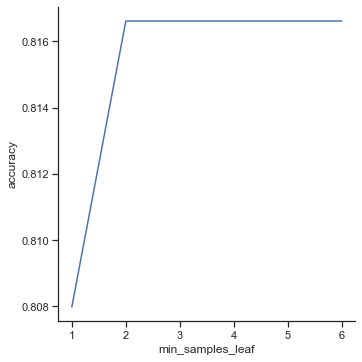

In [358]:
import seaborn as sns
sns.relplot(x="min_samples_leaf", y="accuracy", kind='line', data=df2);

####  Gradually increasing min_samples_leaf from 2 to 6 with max_depth=6

In [359]:
tree_leaf_clf = DecisionTreeClassifier(max_depth=6, random_state=42,min_samples_leaf=2)
tree_leaf_clf.fit(X_train, y_train)
y_pred = tree_leaf_clf.predict(X_test)
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.8187702265372169


In [360]:
tree_leaf_clf = DecisionTreeClassifier(max_depth=6, random_state=42,min_samples_leaf=3)
tree_leaf_clf.fit(X_train, y_train)
y_pred = tree_leaf_clf.predict(X_test)
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.8155339805825242


In [361]:
tree_leaf_clf = DecisionTreeClassifier(max_depth=6, random_state=42,min_samples_leaf=4)
tree_leaf_clf.fit(X_train, y_train)
y_pred = tree_leaf_clf.predict(X_test)
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.8220064724919094


In [362]:
tree_leaf_clf = DecisionTreeClassifier(max_depth=6, random_state=42,min_samples_leaf=5)
tree_leaf_clf.fit(X_train, y_train)
y_pred = tree_leaf_clf.predict(X_test)
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.8252427184466019


In [363]:
tree_leaf_clf = DecisionTreeClassifier(max_depth=6, random_state=42,min_samples_leaf=6)
tree_leaf_clf.fit(X_train, y_train)
y_pred = tree_leaf_clf.predict(X_test)
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.8284789644012945


#### Increasing ccp_alpha for pruning

In [364]:
tree_ccp_clf = DecisionTreeClassifier(max_depth=3, random_state=42,ccp_alpha=0.5)
tree_ccp_clf.fit(X_train, y_train)
y_pred = tree_ccp_clf.predict(X_test)
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.7653721682847896


In [365]:
tree_ccp_clf = DecisionTreeClassifier(max_depth=3, random_state=42,ccp_alpha=1.0)
tree_ccp_clf.fit(X_train, y_train)
y_pred = tree_ccp_clf.predict(X_test)
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.7653721682847896


In [366]:
tree_ccp_clf = DecisionTreeClassifier(max_depth=3, random_state=42,ccp_alpha=2.0)
tree_ccp_clf.fit(X_train, y_train)
y_pred = tree_ccp_clf.predict(X_test)
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.7653721682847896


In [367]:
tree_ccp_clf = DecisionTreeClassifier(max_depth=3, random_state=42,ccp_alpha=3.0)
tree_ccp_clf.fit(X_train, y_train)
y_pred = tree_ccp_clf.predict(X_test)
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.7653721682847896


In [368]:
tree_ccp_clf = DecisionTreeClassifier(max_depth=6, random_state=42,ccp_alpha=0.5)
tree_ccp_clf.fit(X_train, y_train)
y_pred = tree_ccp_clf.predict(X_test)
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.7653721682847896


In [369]:
tree_ccp_clf = DecisionTreeClassifier(max_depth=6, random_state=42,ccp_alpha=1.0)
tree_ccp_clf.fit(X_train, y_train)
y_pred = tree_ccp_clf.predict(X_test)
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.7653721682847896


In [370]:
tree_ccp_clf = DecisionTreeClassifier(max_depth=6, random_state=42,ccp_alpha=2.0)
tree_ccp_clf.fit(X_train, y_train)
y_pred = tree_ccp_clf.predict(X_test)
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.7653721682847896


In [371]:
tree_ccp_clf = DecisionTreeClassifier(max_depth=6, random_state=42,ccp_alpha=3.0)
tree_ccp_clf.fit(X_train, y_train)
y_pred = tree_ccp_clf.predict(X_test)
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.7653721682847896


#### Moving 30% from training to testing set

In [374]:
X_train, X_test, y_train, y_test = train_test_split(X_df, y, test_size=0.5, random_state=1)

In [375]:
tree_rand_split_clf = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_rand_split_clf.fit(X_train, y_train)
y_pred = tree_rand_split_clf.predict(X_test)
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.8147668393782384


#### Moving 60% from training to test set 

In [376]:
X_train, X_test, y_train, y_test = train_test_split(X_df, y, test_size=0.8, random_state=1)

In [377]:
tree_rand_split_clf = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_rand_split_clf.fit(X_train, y_train)
y_pred = tree_rand_split_clf.predict(X_test)
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.797165991902834


#### From the above tests its clear that the original model overfitted in comparison to the model trained on 30% less data 

## Random Forest Classifier

In [392]:
X_train, X_test, y_train, y_test = train_test_split(X_df, y, test_size=0.2, random_state=1)

In [393]:
rfc = RandomForestClassifier(max_depth=3, random_state=0)
rfc = rf.fit(X_train,y_train)
y_train_pred = rfc.predict(X_train)
print("Accuracy:",accuracy_score(y_train, y_train_pred))

Accuracy: 0.8221952207371406


In [394]:
scores = cross_val_score(rfc, X_train, y_train, cv=10)
scores

/Users/adithyasripada/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


array([0.8097166 , 0.81781377, 0.81781377, 0.82995951, 0.8097166 ,
       0.8097166 , 0.8340081 , 0.81376518, 0.79352227, 0.79674797])

#### As with the decision tree classifier, 10-fold cross validation makes more realistic estimates of accuracy 

In [395]:
y_pred = rfc.predict(X_test)
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.813915857605178


#### As can be seen, even in this case as with decision trees, accuracy is overestimated on training data

#### Moving 30% from training to testing set

In [396]:
X_train, X_test, y_train, y_test = train_test_split(X_df, y, test_size=0.5, random_state=1)

In [397]:
rfc = RandomForestClassifier(max_depth=3, random_state=0)
rfc = rf.fit(X_train,y_train)
y_pred = rfc.predict(X_test)
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.7979274611398963


#### Moving 60% from training to test set

In [398]:
X_train, X_test, y_train, y_test = train_test_split(X_df, y, test_size=0.8, random_state=1)

In [399]:
rfc = RandomForestClassifier(max_depth=3, random_state=0)
rfc = rf.fit(X_train,y_train)
y_pred = rfc.predict(X_test)
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.7842105263157895


#### The above tests do not show that the original model overfitted 